In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [113]:
data = pd.read_csv("./data/Titanic_train.csv")
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [115]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# DEA(탐색적 데이터분석)
* 데이터의 특성, 분포, 변환
* 수치형 데이터, 범주형 데이터를 따로 분석

In [116]:
data['Age'] = data['Age'].fillna(data['Age'].mean())

In [117]:
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode())

In [118]:
data = data.drop('Cabin', axis=1)
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C


# 범주형 데이터와 수치형 데이터 분리

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [120]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [121]:
categorical_1 = data[['Name', 'Sex', 'Ticket',  'Embarked']]
numerical_1 = data[[ 'Age', 'SibSp', 'Parch',  'Fare', 'Pclass','Survived']]

In [122]:
categorical_1.describe(include='all')

,Name,Sex,Ticket,Embarked
count,891,891,891,889
unique,891,2,681,3
top,"Dooley, Mr. Patrick",male,347082,S
freq,1,577,7,644


In [123]:
for cat_cols in categorical_1:
    print(cat_cols)
    print(data[cat_cols].value_counts())

Name
Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64
Sex
Sex
male      577
female    314
Name: count, dtype: int64
Ticket
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: 

dtype()을 출력해서 조건문으로 범주형과 수치형 자료를 분리

In [124]:
categorical_2_cols = []
numerical_2_cols = []
for col in data:
    # print(col, data[col].dtype)
    if data[col].dtype =='object':
        categorical_2_cols.append(col)
    else:
        numerical_2_cols.append(col)
print(categorical_2_cols)
print(numerical_2_cols)

['Name', 'Sex', 'Ticket', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [125]:
data[categorical_2_cols]

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S
...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,S
887,"Graham, Miss. Margaret Edith",female,112053,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,S
889,"Behr, Mr. Karl Howell",male,111369,C


In [126]:
data[numerical_2_cols]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


select_dtypes()를 이용한 범주형, 수치형 변수 구분하기

In [127]:
cate_cols =  data.select_dtypes(include=['object'])

In [128]:
num_cols = data.select_dtypes(exclude=['object'])

Name
Dooley, Mr. Patrick                                    1
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    1
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Hewlett, Mrs. (Mary D Kingcome)                        1
Vestrom, Miss. Hulda Amanda Adolfina                   1
Andersson, Mr. Anders Johan                            1
Saundercock, Mr. William Henry                         1
Bonnell, Miss. Elizabeth                               1
Name: count, Length: 891, dtype: int64


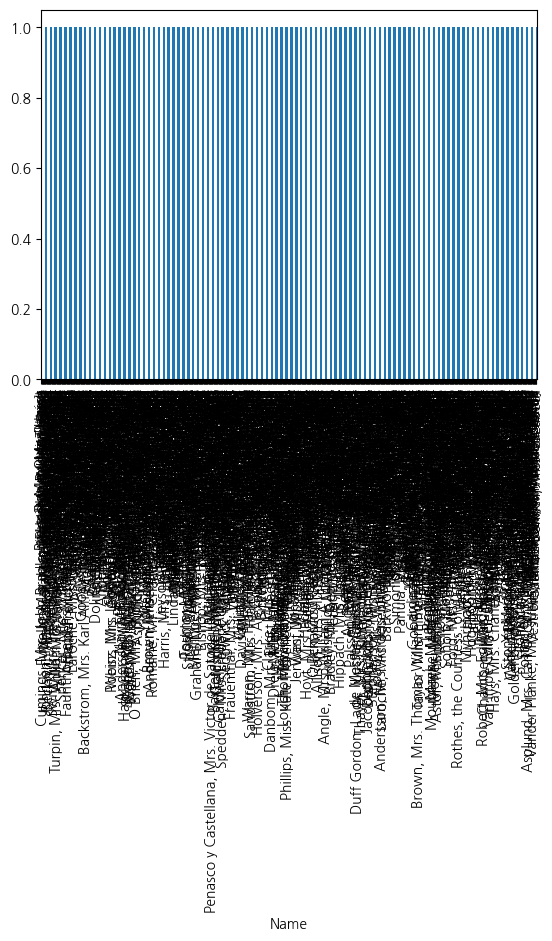

Sex
male      577
female    314
Name: count, dtype: int64


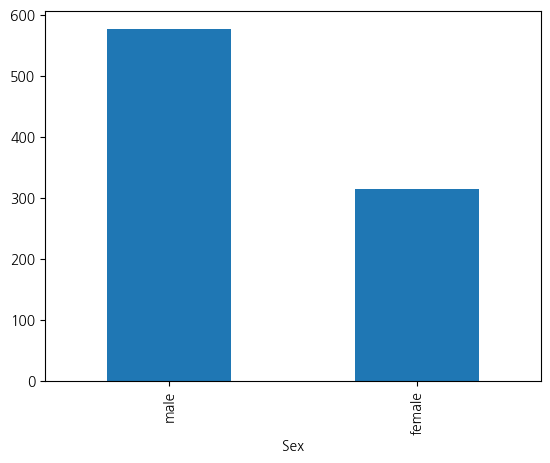

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64


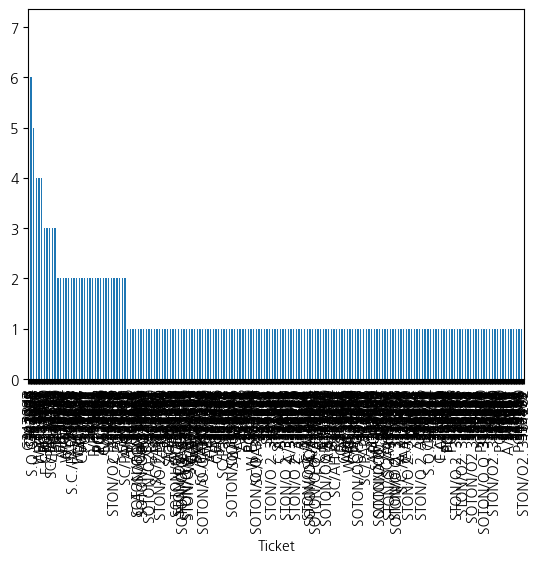

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


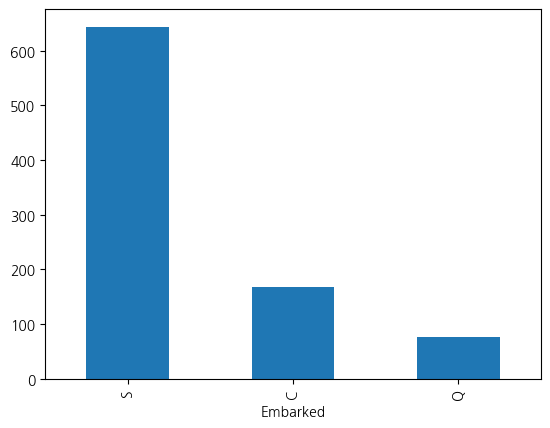

In [129]:
for col in cate_cols:
    print(cate_cols[col].value_counts())
    cate_cols[col].value_counts().plot(kind='bar')
    plt.show()

In [130]:
num_cols

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.000000,1,0,7.2500
1,2,1,1,38.000000,1,0,71.2833
2,3,1,3,26.000000,0,0,7.9250
3,4,1,1,35.000000,1,0,53.1000
4,5,0,3,35.000000,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000
887,888,1,1,19.000000,0,0,30.0000
888,889,0,3,29.699118,1,2,23.4500
889,890,1,1,26.000000,0,0,30.0000


In [131]:
data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [132]:
data['PassengerId'].unique

<bound method Series.unique of 0        1
1        2
2        3
3        4
4        5
      ... 
886    887
887    888
888    889
889    890
890    891
Name: PassengerId, Length: 891, dtype: int64>

In [133]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

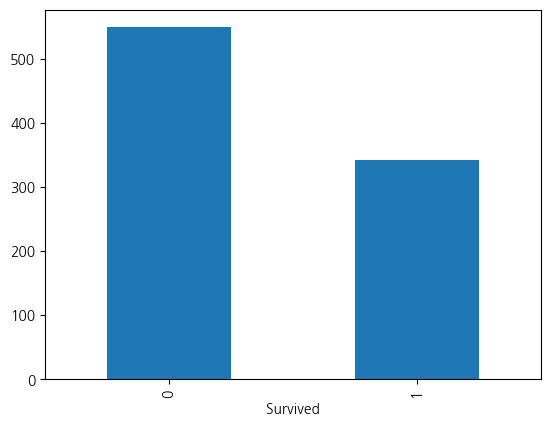

In [134]:
data['Survived'].value_counts().plot(kind="bar")

In [135]:
data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: xlabel='Pclass'>

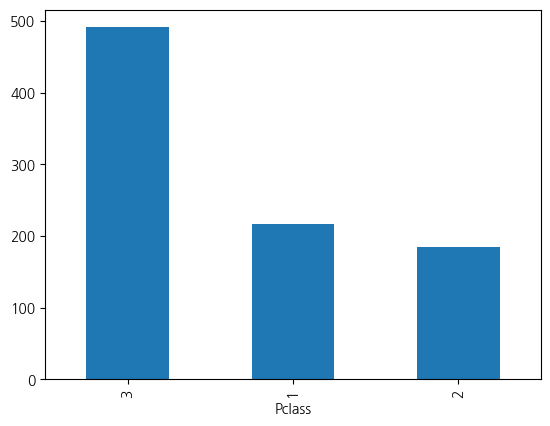

In [136]:
data['Pclass'].value_counts().plot(kind='bar')

In [137]:
data['Name'].nunique()

891

In [138]:
data['Sex']

0        male
1      female
2      female
3      female
4        male
        ...  
886      male
887    female
888    female
889      male
890      male
Name: Sex, Length: 891, dtype: object

In [139]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

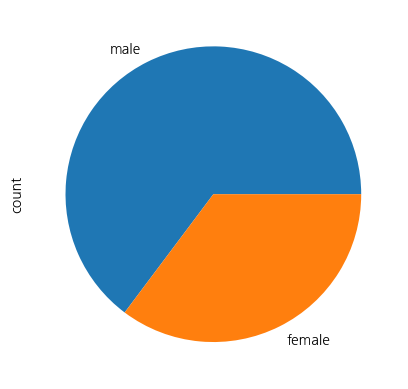

In [140]:
data['Sex'].value_counts().plot(kind='pie')

In [141]:
data['Age'].value_counts()

Age
29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
24.500000      1
0.670000       1
0.420000       1
34.500000      1
74.000000      1
Name: count, Length: 89, dtype: int64

In [142]:
data['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

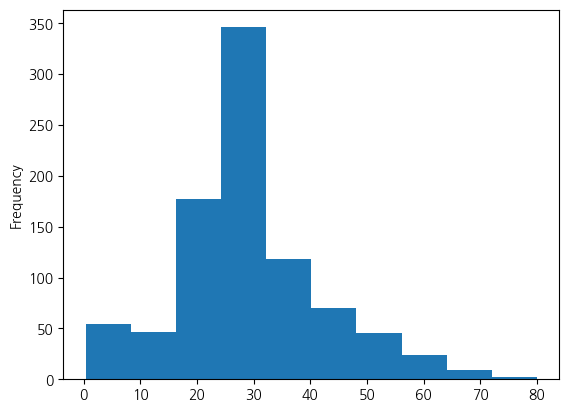

In [143]:
data['Age'].plot(kind='hist')

In [144]:
# 외도 구하기. 왼쪽으로 치우쳐져 있으면 + , 오른쪽으로 치우쳐져 있으면 - 
data['Age'].skew()

np.float64(0.4344880940129925)

In [145]:
data['SibSp']

0      1
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    1
889    0
890    0
Name: SibSp, Length: 891, dtype: int64

In [146]:
data['SibSp'].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

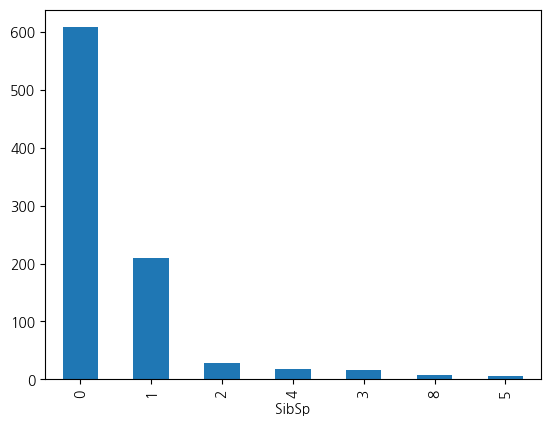

In [147]:
data['SibSp'].value_counts().plot(kind='bar')

In [148]:
data['Parch'].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

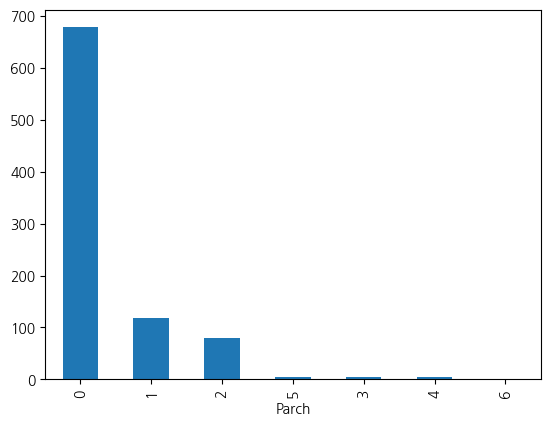

In [149]:
data['Parch'].value_counts().plot(kind='bar')

In [150]:
data['Ticket'].value_counts()

Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

In [151]:
data['Fare'].value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
13.8583     1
50.4958     1
5.0000      1
9.8458      1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: ylabel='Frequency'>

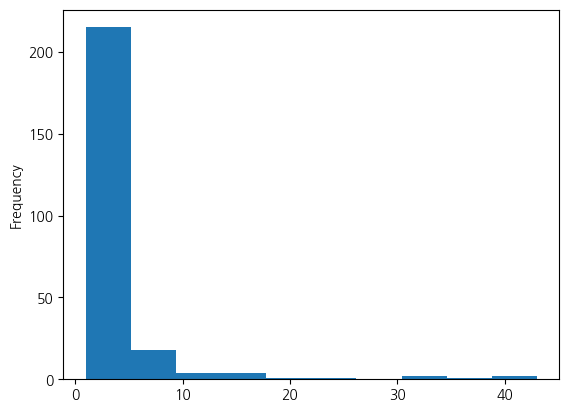

In [152]:
data['Fare'].value_counts().plot(kind='hist')

In [153]:
fare_desc = data['Fare'].describe()

In [154]:
maximun = fare_desc.loc['75%']+(1.5*(fare_desc.loc['75%']-fare_desc.loc['25%']))
                      

In [155]:
outlire = data[data['Fare'] > maximun ]
outlire

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,29.699118,1,0,PC 17569,146.5208,C
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.000000,1,0,PC 17604,82.1708,C
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.000000,1,0,PC 17572,76.7292,C
...,...,...,...,...,...,...,...,...,...,...,...
846,847,0,3,"Sage, Mr. Douglas Bullen",male,29.699118,8,2,CA. 2343,69.5500,S
849,850,1,1,"Goldenberg, Mrs. Samuel L (Edwiga Grabowska)",female,29.699118,1,0,17453,89.1042,C
856,857,1,1,"Wick, Mrs. George Dennick (Mary Hitchcock)",female,45.000000,1,1,36928,164.8667,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,29.699118,8,2,CA. 2343,69.5500,S


## Fare를 pclass별로 나누어 확인

In [156]:
pc_fare_desc = data[['Pclass','Fare']].groupby('Pclass').describe()
pc_fare_desc

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       491.0  13.675550  11.778142  0.0   7.75000   8.0500  15.5   69.5500

In [157]:
pc_fare_desc.columns

MultiIndex([('Fare', 'count'),
            ('Fare',  'mean'),
            ('Fare',   'std'),
            ('Fare',   'min'),
            ('Fare',   '25%'),
            ('Fare',   '50%'),
            ('Fare',   '75%'),
            ('Fare',   'max')],
           )

In [158]:
pc1_max = pc_fare_desc.loc[1,('Fare','75%')]+ (1.5 * pc_fare_desc.loc[1,('Fare','75%')]-pc_fare_desc.loc[1,('Fare','25%')])
pc2_max = pc_fare_desc.loc[2,('Fare','75%')]+ (1.5 * pc_fare_desc.loc[2,('Fare','75%')]-pc_fare_desc.loc[2,('Fare','25%')])
pc3_max = pc_fare_desc.loc[3,('Fare','75%')]+ (1.5 * pc_fare_desc.loc[3,('Fare','75%')]-pc_fare_desc.loc[3,('Fare','25%')])

In [159]:
data[(data['Pclass'] == 1) &(data['Fare'] > pc1_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.000000,3,2,19950,263.0000,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.000000,3,2,19950,263.0000,S
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.000000,0,1,PC 17558,247.5208,C
258,259,1,1,"Ward, Miss. Anna",female,35.000000,0,0,PC 17755,512.3292,C
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.000000,0,1,PC 17558,247.5208,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.000000,2,2,PC 17608,262.3750,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.000000,3,2,19950,263.0000,S
377,378,0,1,"Widener, Mr. Harry Elkins",male,27.000000,0,2,113503,211.5000,C
380,381,1,1,"Bidois, Miss. Rosalie",female,42.000000,0,0,PC 17757,227.5250,C
438,439,0,1,"Fortune, Mr. Mark",male,64.000000,1,4,19950,263.0000,S


In [160]:
data[(data['Pclass'] == 2) &(data['Fare'] > pc2_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5,S
385,386,0,2,"Davies, Mr. Charles Henry",male,18.0,0,0,S.O.C. 14879,73.5,S
615,616,1,2,"Herman, Miss. Alice",female,24.0,1,2,220845,65.0,S
655,656,0,2,"Hickman, Mr. Leonard Mark",male,24.0,2,0,S.O.C. 14879,73.5,S
665,666,0,2,"Hickman, Mr. Lewis",male,32.0,2,0,S.O.C. 14879,73.5,S
754,755,1,2,"Herman, Mrs. Samuel (Jane Laver)",female,48.0,1,2,220845,65.0,S


In [161]:
data[(data['Pclass'] == 3) &(data['Fare'] > pc3_max)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.000000,1,5,347082,31.2750,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,S
50,51,0,3,"Panula, Master. Juha Niilo",male,7.000000,4,1,3101295,39.6875,S
59,60,0,3,"Goodwin, Master. William Frederick",male,11.000000,5,2,CA 2144,46.9000,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.000000,5,2,CA 2144,46.9000,S
74,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,S
86,87,0,3,"Ford, Mr. William Neal",male,16.000000,1,3,W./C. 6608,34.3750,S
119,120,0,3,"Andersson, Miss. Ellis Anna Maria",female,2.000000,4,2,347082,31.2750,S
147,148,0,3,"Ford, Miss. Robina Maggie ""Ruby""",female,9.000000,2,2,W./C. 6608,34.3750,S
159,160,0,3,"Sage, Master. Thomas Henry",male,29.699118,8,2,CA. 2343,69.5500,S


In [162]:
data['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

<Axes: xlabel='Embarked'>

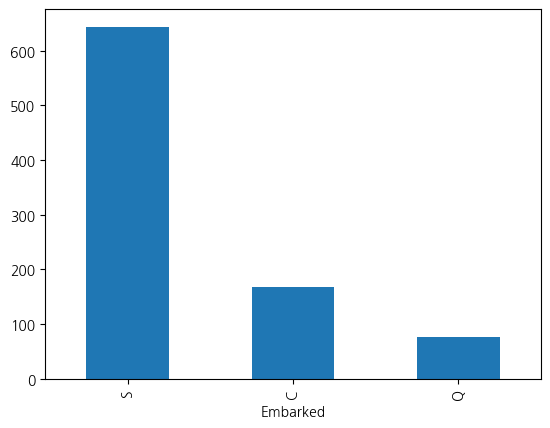

In [163]:
data['Embarked'].value_counts().plot(kind='bar')

# 타겟변수(Survived)와 독립변수(Survived를 제외한 나머지) 관계 파악하기
* groupby

In [164]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [165]:
data[['Pclass','Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Pclass는 생존률에 영향을 미침. 1이면 높고 3이면 낮다 

In [166]:
data[['Name','Survived']].groupby('Name').mean()

,Survived
Name,
"Abbing, Mr. Anthony",0.0
"Abbott, Mr. Rossmore Edward",0.0
"Abbott, Mrs. Stanton (Rosa Hunt)",1.0
"Abelson, Mr. Samuel",0.0
"Abelson, Mrs. Samuel (Hannah Wizosky)",1.0
...,...
"de Mulder, Mr. Theodore",1.0
"de Pelsmaeker, Mr. Alfons",0.0
"del Carlo, Mr. Sebastiano",0.0


In [167]:
data[['Sex','Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


성별별 생존율 : 여자가 남자보다 생존율이 높다.

In [168]:
data[['Age','Survived']].groupby('Age').mean()

,Survived
Age,
0.42,1.0
0.67,1.0
0.75,1.0
0.83,1.0
0.92,1.0
...,...
70.00,0.0
70.50,0.0
71.00,0.0


* 나이를 구간화해서 생존률과의 관계 파악
    * 10, 20, 30, 40, 50
    * 0 - 10 under10s
    * 10 - 19 10s
    * 20 -29 20s

In [169]:
def age_cat(x):
    if x < 10:
        return "under 10s"
    elif 10 <= x < 20:
        return "10s"
    elif 10 <= x < 20:
        return "10s"
    elif 20 <= x < 30:
        return "20s"
    elif 30 <= x < 40:
        return "30s"
    elif 40 <= x < 50:
        return "40s"
    elif 50 <= x < 60:
        return "50s"
    elif 60 <= x < 70:
        return "10s"
    elif 80 <= x < 90:
        return "80s"

In [170]:
data['age_cat'] = data['Age'].apply(age_cat)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,30s


연령대별 생존률 구하기

In [171]:
data[['age_cat','Survived']].groupby('age_cat').mean().sort_values(by="Survived", ascending=False)

,Survived
age_cat,
80s,1.000000
under 10s,0.612903
30s,0.437126
50s,0.416667
10s,0.388430
40s,0.382022
20s,0.324937


In [172]:
data[['SibSp', 'Survived']].groupby('SibSp').mean().sort_values(by="Survived", ascending=False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


In [173]:
data[['Parch', 'Survived']].groupby('Parch').mean().sort_values(by="Survived", ascending=False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


In [174]:
data[['Ticket', 'Survived']].groupby('Ticket').mean().sort_values(by="Survived", ascending=False)

,Survived
Ticket,
W./C. 14258,1.0
110152,1.0
STON/O 2. 3101269,1.0
SOTON/OQ 392089,1.0
SOTON/O.Q. 392078,1.0
...,...
W./C. 6609,0.0
315093,0.0
W/C 14208,0.0


In [175]:
data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [176]:
data[['Embarked', 'Survived']].groupby('Embarked').mean().sort_values(by="Survived", ascending=False)

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


* pclass, sex, age_cat

In [177]:
data[['Pclass', 'Sex', 'Survived']].groupby(['Pclass','Sex']).mean()

Survived
Pclass Sex             
1      female  0.968085
       male    0.368852
2      female  0.921053
       male    0.157407
3      female  0.500000
       male    0.135447

In [178]:
data[['Pclass', 'Sex', 'age_cat', 'Survived']].groupby(['Pclass','Sex', 'age_cat']).mean().sort_values(by='Survived', ascending=False)

Survived
Pclass Sex    age_cat            
1      female 10s        1.000000
              30s        1.000000
              40s        1.000000
       male   80s        1.000000
2      male   under 10s  1.000000
       female under 10s  1.000000
              10s        1.000000
1      male   under 10s  1.000000
       female 20s        0.960000
2      female 30s        0.941176
1      female 50s        0.916667
2      female 40s        0.900000
              20s        0.888889
              50s        0.833333
3      female 10s        0.560000
              20s        0.547945
              under 10s  0.523810
1      male   30s        0.521739
3      female 30s        0.437500
       male   under 10s  0.380952
1      male   40s        0.375000
              20s        0.358974
              50s        0.266667
              10s        0.200000
2      male   10s        0.153846
3      male   30s        0.150943
              20s        0.127551
2      male   40s        0.125000
              30s        0.096774
3      male   10s        0.090909
              40s        0.080000
2      male   20s        0.054054
1      female under 10s  0.000000
2      male   50s        0.000000
3      female 40s        0.000000
       male   50s        0.000000

In [181]:
grouped = data[['Pclass', 'Sex', 'age_cat', 'Survived']].groupby(['Pclass', 'Sex', 'age_cat']).mean().sort_values(by='Survived', ascending=False).reset_index()

In [182]:
grouped

,Pclass,Sex,age_cat,Survived
0,1,female,10s,1.000000
1,1,female,30s,1.000000
2,1,female,40s,1.000000
3,1,male,80s,1.000000
4,2,male,under 10s,1.000000
5,2,female,under 10s,1.000000
6,2,female,10s,1.000000
7,1,male,under 10s,1.000000
8,1,female,20s,0.960000
9,2,female,30s,0.941176


* 데이터의 구간화를 쉽게 해주는 함수 cut
* pd.cut(data['Age'], bins=[구간], labels['구간의 이름'])

In [183]:
data['age_cat2'] = pd.cut(data['Age'], 
       bins=[0,10,20,30,40,50,60,70,80,90],
      labels = ['under10s', '10s', '20s', '30s', '40s', '50s', '60s', '70s', '80s'])

In [184]:
data[['age_cat','age_cat2']]

,age_cat,age_cat2
0,20s,20s
1,30s,30s
2,20s,20s
3,30s,30s
4,30s,30s
...,...,...
886,20s,20s
887,10s,10s
888,20s,20s
889,20s,20s


In [185]:
grouped = data[['Pclass', 'Sex', 'age_cat', 'Survived']].groupby(['Pclass', 'Sex', 'age_cat']).mean().sort_values(by='Survived', ascending=False).reset_index()

In [186]:
grouped

,Pclass,Sex,age_cat,Survived
0,1,female,10s,1.000000
1,1,female,30s,1.000000
2,1,female,40s,1.000000
3,1,male,80s,1.000000
4,2,male,under 10s,1.000000
5,2,female,under 10s,1.000000
6,2,female,10s,1.000000
7,1,male,under 10s,1.000000
8,1,female,20s,0.960000
9,2,female,30s,0.941176


<Figure size 1400x600 with 0 Axes>

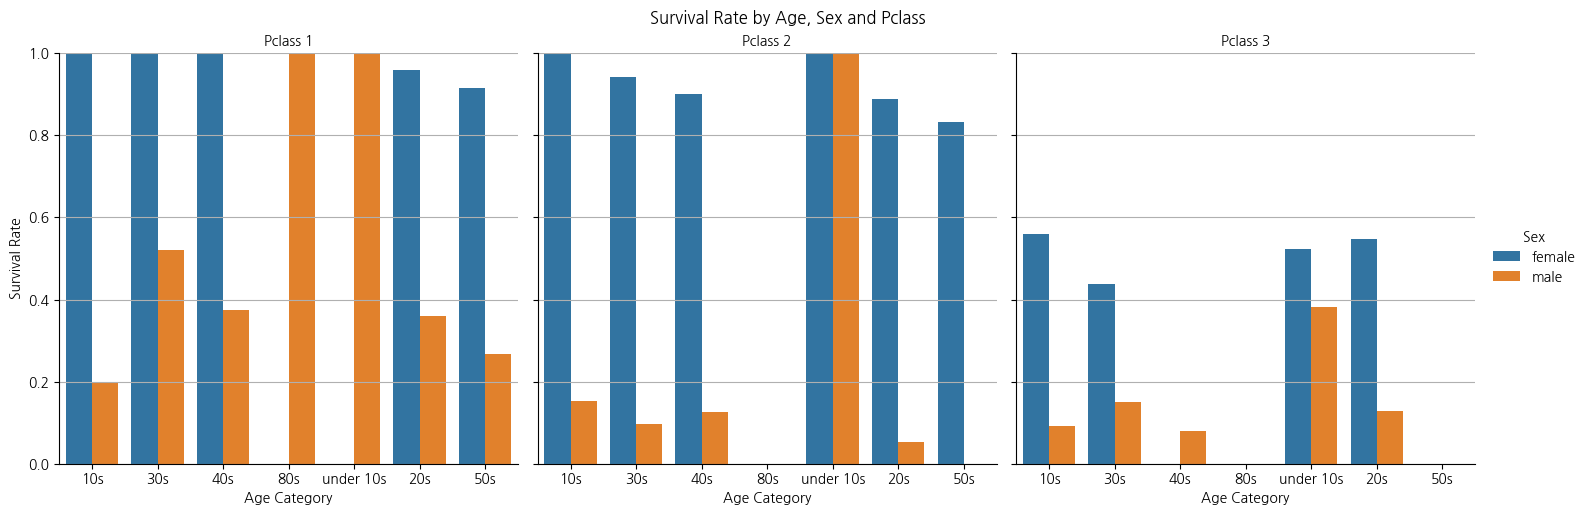

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

g = sns.catplot(
    data=grouped,
    x='age_cat',
    y='Survived',
    hue='Sex',
    col='Pclass',   # Pclass별로 나눠 그림
    kind='bar',
    height=5,
    aspect=1
)

g.fig.suptitle('Survival Rate by Age, Sex and Pclass', y=1.02)
g.set_axis_labels('Age Category', 'Survival Rate')
g.set_titles('Pclass {col_name}')
for ax in g.axes.flatten():
    ax.set_ylim(0, 1)
    ax.grid(axis='y')
plt.show()

# 변수들 간의 상관관계 보기 .corr()
* .corr()
* -1 0 1
* -1: 음의 상관관계(반비례 관계, 집과 역의 거리가 멀면 집값이 떨어진다)
* 0: 관계가 없음
* 1: 양의 상관관계 (정비례 관계, 날시가 더워지면 아이스크림 판매량이 높아진다)

In [188]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'age_cat', 'age_cat2'],
      dtype='object')

In [189]:
data[['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp',
       'Parch', 'Fare']].corr(method="spearman")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.034091,0.041560,-0.061161,0.001235,-0.013975
Survived,-0.005007,1.000000,-0.339668,-0.039109,0.088879,0.138266,0.323736
Pclass,-0.034091,-0.339668,1.000000,-0.308875,-0.043019,-0.022801,-0.688032
Age,0.041560,-0.039109,-0.308875,1.000000,-0.147035,-0.217290,0.118847
SibSp,-0.061161,0.088879,-0.043019,-0.147035,1.000000,0.450014,0.447113
Parch,0.001235,0.138266,-0.022801,-0.217290,0.450014,1.000000,0.410074
Fare,-0.013975,0.323736,-0.688032,0.118847,0.447113,0.410074,1.000000


# 데이터 전처리를 안하고 알고리즘에 넣었을떄 생기는 일

In [190]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [191]:
df = pd.read_csv("./data/Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [192]:
X = data.drop('Survived', axis=1)
y = data['Survived']

In [193]:
X 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat,age_cat2
0,1,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,20s,20s
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,30s,30s
2,3,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,20s,20s
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,30s,30s
4,5,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,30s,30s
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,20s,20s
887,888,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,10s,10s
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,S,20s,20s
889,890,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,20s,20s


In [194]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [195]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state= 7)

In [196]:
X_train

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat,age_cat2
192,193,3,"Andersen-Jensen, Miss. Carla Christine Nielsine",female,19.000000,1,0,350046,7.8542,S,10s,10s
191,192,2,"Carbines, Mr. William",male,19.000000,0,0,28424,13.0000,S,10s,10s
714,715,2,"Greenberg, Mr. Samuel",male,52.000000,0,0,250647,13.0000,S,50s,50s
532,533,3,"Elias, Mr. Joseph Jr",male,17.000000,1,1,2690,7.2292,C,10s,10s
132,133,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.000000,1,0,A/5. 3337,14.5000,S,40s,40s
...,...,...,...,...,...,...,...,...,...,...,...,...
579,580,3,"Jussila, Mr. Eiriik",male,32.000000,0,0,STON/O 2. 3101286,7.9250,S,30s,30s
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,29.699118,0,0,330909,7.6292,Q,20s,20s
537,538,1,"LeRoy, Miss. Bertha",female,30.000000,0,0,PC 17761,106.4250,C,30s,20s
196,197,3,"Mernagh, Mr. Robert",male,29.699118,0,0,368703,7.7500,Q,20s,20s


In [197]:
X_test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,age_cat,age_cat2
725,726,3,"Oreskovic, Mr. Luka",male,20.000000,0,0,315094,8.6625,S,20s,10s
861,862,2,"Giles, Mr. Frederick Edward",male,21.000000,1,0,28134,11.5000,S,20s,20s
528,529,3,"Salonen, Mr. Johan Werner",male,39.000000,0,0,3101296,7.9250,S,30s,30s
46,47,3,"Lennon, Mr. Denis",male,29.699118,1,0,370371,15.5000,Q,20s,20s
627,628,1,"Longley, Miss. Gretchen Fiske",female,21.000000,0,0,13502,77.9583,S,20s,20s
...,...,...,...,...,...,...,...,...,...,...,...,...
347,348,3,"Davison, Mrs. Thomas Henry (Mary E Finck)",female,29.699118,1,0,386525,16.1000,S,20s,20s
218,219,1,"Bazzani, Miss. Albina",female,32.000000,0,0,11813,76.2917,C,30s,30s
239,240,2,"Hunt, Mr. George Henry",male,33.000000,0,0,SCO/W 1585,12.2750,S,30s,30s
491,492,3,"Windelov, Mr. Einar",male,21.000000,0,0,SOTON/OQ 3101317,7.2500,S,20s,20s


In [198]:
y_test

725    0
861    0
528    0
46     0
627    1
      ..
347    1
218    1
239    0
491    0
872    0
Name: Survived, Length: 268, dtype: int64

In [199]:
y_train

192    1
191    0
714    0
532    0
132    0
      ..
579    1
502    0
537    1
196    0
175    0
Name: Survived, Length: 623, dtype: int64

In [200]:
dct = DecisionTreeClassifier()
dct.fit(X_train,y_train)
pred = dct.predict(X_test)
print(y_test, pred )


ValueError: could not convert string to float: 'Andersen-Jensen, Miss. Carla Christine Nielsine'

# Feature Engineering
* 필요없는 변수 삭제
* 필요한 변수만 선택
* 새로운 변수 생성(파생변수)
* 카테고리 변수에 대한 label encoding, one-hot encoding

In [201]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [202]:
	
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [204]:
df = df.drop(['PassengerId', 'Name', 'Cabin'], axis=1)

In [205]:
df = df.drop('Ticket', axis=1)

In [206]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


In [207]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [208]:
	
# 파생변수 생성하기 형자자매 컬럼과 부모자식 컬럼을 합쳐서 가족 컬럼생성
df['Family'] = df['SibSp'] + df['Parch']
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family
0,0,3,male,22.000000,1,0,7.2500,S,1
1,1,1,female,38.000000,1,0,71.2833,C,1
2,1,3,female,26.000000,0,0,7.9250,S,0
3,1,1,female,35.000000,1,0,53.1000,S,1
4,0,3,male,35.000000,0,0,8.0500,S,0
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,0
887,1,1,female,19.000000,0,0,30.0000,S,0
888,0,3,female,29.699118,1,2,23.4500,S,3
889,1,1,male,26.000000,0,0,30.0000,C,0


In [209]:
df = df.drop(['SibSp', 'Parch'], axis=1)

# 문자로 되어있는 범주형 자료를 숫자로 변환하기
* 조건문을 이용해서 숫자로 변환하기
* label encoding을 이용해서 변환하기 - 나중에 숫자에서 문자로 복원 가능 (서열이 있기 때문에 회귀분석에서 문제가 도리수도 있다)
* one-hot encoding unique value의 갯수만큼 새로운 컬럼을 만들어서 0/1 구분 백터
* male 1/0, female 1/0 - 컬럼을 생성하고 bool 사용

* 반복문과 조건문을 이용해서 바꾸기

In [210]:
result =[]
for i in df['Sex']:
    if i =='male':
        result.append(0)
    else:
        result.append(1)
df['Sex2'] = result

In [90]:
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Sex2
0,0,3,male,22.000000,7.2500,S,1,0
1,1,1,female,38.000000,71.2833,C,1,1
2,1,3,female,26.000000,7.9250,S,0,1
3,1,1,female,35.000000,53.1000,S,1,1
4,0,3,male,35.000000,8.0500,S,0,0
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,0
887,1,1,female,19.000000,30.0000,S,0,1
888,0,3,female,29.699118,23.4500,S,3,1
889,1,1,male,26.000000,30.0000,C,0,0


* 문자열을 사용해서 바꾸기

In [91]:
df['Sex3'] = df['Sex'].str.replace('female','1').str.replace('male', '0')
df['Sex3']  =  df['Sex3'].astype('int') 

* 함수를 이용해서 바꾸기

In [211]:
df['Sex'].apply(lambda x: 0 if x=='male' else 1)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

* label encoding을 이용해서 변환하기 

In [212]:
from sklearn.preprocessing import LabelEncoder

In [213]:
le = LabelEncoder()
sex_le = le.fit_transform(df['Sex'])
sex_le 

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

In [214]:
df['sex_le'] = sex_le
df

,Survived,Pclass,Sex,Age,Fare,Embarked,Family,Sex2,sex_le
0,0,3,male,22.000000,7.2500,S,1,0,1
1,1,1,female,38.000000,71.2833,C,1,1,0
2,1,3,female,26.000000,7.9250,S,0,1,0
3,1,1,female,35.000000,53.1000,S,1,1,0
4,0,3,male,35.000000,8.0500,S,0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,13.0000,S,0,0,1
887,1,1,female,19.000000,30.0000,S,0,1,0
888,0,3,female,29.699118,23.4500,S,3,1,0
889,1,1,male,26.000000,30.0000,C,0,0,1


In [215]:
le.inverse_transform(sex_le)

array(['male', 'female', 'female', 'female', 'male', 'male', 'male',
       'male', 'female', 'female', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'male', 'female', 'female', 'male',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'male', 'male', 'male', 'female', 'female', 'female', 'female',
       'male', 'female', 'female', 'male', 'male', 'female', 'male',
       'female', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'male', 'female', 'male', 'male', 'female', 'male',
       'male', 'male', 'male', 'female', 'male', 'female', 'male', 'male',
       'female', 'male', 'male', 'male', 'male', 'male', 'male', 'male',
       'female', 'male', 'male', 'female', 'male', 'female', 'female',
       'male', 'male', 'female', 'male', 'male', 'male', 'male', 'male',
       'male', 'male', 'male', 'male', 'female', 'male', 'female', 'male',
      

### one-hot encoding
* value의 개수만큼 새로운 컬럼(변수)을 만들어서 0/1 표시
* 자료의 서열이 사라짐
* 더미변수 만들기, get_dummies()
* value가 너무 많으면 변수의 수가 너무 많이 증가 문제 발생
* 변수가 너무 많이 늘어나면 다중공선성
* get_dummies(df, drop_first=True)

In [219]:
df2 = pd.get_dummies(df, columns=['Sex', 'Family', 'Embarked'], drop_first=True)

In [221]:
X = df2.drop(['Survived', 'Fare', 'Sex2','sex_le'], axis=1)

In [222]:
X

,Pclass,Age,Sex_male,Family_1,Family_2,Family_3,Family_4,Family_5,Family_6,Family_7,Family_10,Embarked_Q,Embarked_S
0,3,22.000000,True,True,False,False,False,False,False,False,False,False,True
1,1,38.000000,False,True,False,False,False,False,False,False,False,False,False
2,3,26.000000,False,False,False,False,False,False,False,False,False,False,True
3,1,35.000000,False,True,False,False,False,False,False,False,False,False,True
4,3,35.000000,True,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.000000,True,False,False,False,False,False,False,False,False,False,True
887,1,19.000000,False,False,False,False,False,False,False,False,False,False,True
888,3,29.699118,False,False,False,True,False,False,False,False,False,False,True
889,1,26.000000,True,False,False,False,False,False,False,False,False,False,False


In [223]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=10)

In [224]:
dtc= DecisionTreeClassifier(random_state = 10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(y_test, pred)
y_test_df =  dp.DataFrame(y_test)
pred_df = dp.DataFrame(pred)
pd.DataFrame([[y_test.T,pred.T], columns=["y_test","pred"]

SyntaxError: '[' was never closed (2124036877.py, line 7)

In [ ]:
rfc = RandomForestClassifier(random_state=10)
rfc.fit(X_train, y_train)
pred = rfc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
dtc = DecisionTreeClassifier(random_state=10)
dtc.fit(X_train, y_train)
pred = dtc.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(random_state=10)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print(accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

# 모델의 성능 테스트

In [102]:
from sklearn.metrics import accuracy_score, classification_report

In [103]:
print(accuracy_score(y_test,pred))

NameError: name 'pred' is not defined

In [ ]:
print(classification_report(y_test, pred))

# 상관관계 분석 .corr()
* 변수들간의 상관관계 분석
* 1이면 강한 양의 상관관계 정비례
* -1이면 강한 음의 상관관계 반비례
* 0이변 관계가 없음.
* +-0.5가 넘어가면 꽤 강한 상관관계 고민을 해봐야함
* +-0.7이상이면 두 변수중 한개만 선택
* method = 'pearson' : 숫자형 데이터들 간의 상관관계 분석
* method = 'spearman' : 범주형 데이터가 섞여있는 데이터셋의 경우 스피어맵 상관관계 분석

In [108]:
df2.corr(method="spearman")

ValueError: could not convert string to float: 'male'

* 상관관계를 보여주는 그래프 : heatmap

In [109]:
import seaborn as sns

In [111]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(method = 'spearman'), annot=True, linewidth=0.5)

ValueError: could not convert string to float: 'male'

<Figure size 2000x2000 with 0 Axes>